<a href="https://colab.research.google.com/github/YumeDakuzaku/dio_projeto_python/blob/main/dio_projeto_vacinometro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Projeto desenvolvido utilizando as lições e comandos aprendidos durante o curso de python - análise de dados da **Digital Innovation One. **
Resumidamente o projeto visa importar as bibliotecas, realizar upload do arquivo csv, criar uma análise exploratória dos dados e gerar alguns gráficos.  
Fonte da base "vacinometro" : https://vacinaja.sp.gov.br/vacinometro/

In [ ]:
#Importando a biblioteca
import pandas as pd     
# biblioteca matplotlib para geração de gráficos 2D
from matplotlib import pyplot as plt 
%matplotlib inline

In [ ]:
#upload "temporário" do arquivo
from google.colab import files
arquivo = files.upload()


Saving 20210620_vacinometro.csv to 20210620_vacinometro (1).csv


In [ ]:
#fazendo upload do arquivo csv e separando as colunas por ',' e convertendo em UTF-8
df = pd.read_csv('20210620_vacinometro.csv', sep=',', encoding='UTF-8')

In [ ]:
#verificando os nomes das colunas da base
df.columns

Index(['Município', 'Dose', 'Total Doses Aplicadas'], dtype='object')

In [ ]:
# quantidade de registros
df.shape[0]

1290

In [ ]:
# carregando uma amostra de 5 registros
df.head()

,Município,Dose,Total Doses Aplicadas
0,BORÁ,2° DOSE,157
1,NOVA CASTILHO,2° DOSE,207
2,UNIÃO PAULISTA,2° DOSE,253
3,TRABIJU,2° DOSE,266
4,URU,2° DOSE,261


In [ ]:
df.dtypes

Município                object
Dose                     object
Total Doses Aplicadas     int64
dtype: object

In [ ]:
# verificando existência de campos nulos
df.isnull().sum()

Município                0
Dose                     0
Total Doses Aplicadas    0
dtype: int64

In [ ]:
#verificando a quantidade de municípios
len(df['Município'].unique())

645

In [ ]:
#verificando a quantidade de doses
len(df['Dose'].unique())

2

In [ ]:
#Total de doses aplicadas agrupadas por Dose
df.groupby(['Dose'])['Total Doses Aplicadas'].sum()

Dose
1° DOSE    14604583
2° DOSE     5804905
Name: Total Doses Aplicadas, dtype: int64

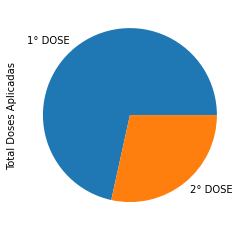

In [ ]:
#Gráfico de pizza Total de Doses Aplicadas x Dose
df.groupby(['Dose'])['Total Doses Aplicadas'].sum().plot.pie()

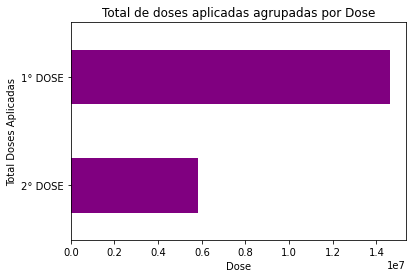

In [ ]:
#Gráfico Total de doses aplicadas agrupadas por Dose e aplicando alteção da cor das barras
df.groupby(['Dose'])['Total Doses Aplicadas'].sum().sort_values(ascending=True).plot.barh(title='Total de doses aplicadas agrupadas por Dose', color='purple')
plt.xlabel('Dose')
plt.ylabel('Total Doses Aplicadas');

In [ ]:
#verificando o total de doses aplicadas
sum(df['Total Doses Aplicadas'])

20409488

In [ ]:
#Total de doses aplicadas agrupadas por município
df.groupby(['Município'])['Total Doses Aplicadas'].sum()

Município
ADAMANTINA            22172
ADOLFO                 2572
AGUAÍ                 14760
AGUDOS                18082
ALAMBARI               2695
                      ...  
ÁGUAS DE SÃO PEDRO     2974
ÁLVARES FLORENCE       2307
ÁLVARES MACHADO       12212
ÁLVARO DE CARVALHO     1816
ÓLEO                   1571
Name: Total Doses Aplicadas, Length: 645, dtype: int64

In [ ]:
#Classificando em ordem decrescente a coluna Total Doses Aplicadas
df.sort_values('Total Doses Aplicadas', ascending=False).head()

,Município,Dose,Total Doses Aplicadas
1289,SÃO PAULO,1° DOSE,4334206
644,SÃO PAULO,2° DOSE,1650555
1288,CAMPINAS,1° DOSE,423507
1287,GUARULHOS,1° DOSE,340006
1285,SÃO JOSÉ DOS CAMPOS,1° DOSE,273864


In [ ]:
#Município com mais doses aplicadas
df.sort_values('Total Doses Aplicadas', ascending=False).head(1)

,Município,Dose,Total Doses Aplicadas
1289,SÃO PAULO,1° DOSE,4334206


In [ ]:
#Classificando em ordem crescente a coluna Total Doses Aplicadas
df.sort_values('Total Doses Aplicadas', ascending=True).head()

,Município,Dose,Total Doses Aplicadas
0,BORÁ,2° DOSE,157
1,NOVA CASTILHO,2° DOSE,207
2,UNIÃO PAULISTA,2° DOSE,253
4,URU,2° DOSE,261
10,PRACINHA,2° DOSE,262


In [ ]:
#Município com menos doses aplicadas
df.sort_values('Total Doses Aplicadas', ascending=True).head(1)

,Município,Dose,Total Doses Aplicadas
0,BORÁ,2° DOSE,157


In [ ]:
#Três municípios com menos doses aplicadas
df.nsmallest(3,'Total Doses Aplicadas')

,Município,Dose,Total Doses Aplicadas
0,BORÁ,2° DOSE,157
1,NOVA CASTILHO,2° DOSE,207
2,UNIÃO PAULISTA,2° DOSE,253


In [ ]:
#Três municípios com mais doses aplicadas
df.nlargest(3,'Total Doses Aplicadas')

,Município,Dose,Total Doses Aplicadas
1289,SÃO PAULO,1° DOSE,4334206
644,SÃO PAULO,2° DOSE,1650555
1288,CAMPINAS,1° DOSE,423507
